In [1]:
%matplotlib inline

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def draw(folder, loss_range=[0, 10]):
    losses = pickle.load(open(os.path.join(folder, "saved_loss.p"), "rb"))
    x = np.squeeze(np.asarray(losses["X"]))
    train_loss = np.squeeze(np.asarray(losses["Y"]))
    val_loss = np.squeeze(np.asarray(losses["Y_test"]))
    
    plt.figure()
    plt.grid()
    axes = plt.gca()
    axes.set_ylim(loss_range)
    plt.title('Loss')
    plt.plot(x, train_loss, label='train')
    plt.plot(x, val_loss, label='val')
    plt.legend()
    
    accuracy = pickle.load(open(os.path.join(folder, "saved_accuracy.p"), "rb"))
    x2 = np.squeeze(np.asarray(accuracy["X"]))
    P = accuracy["P"]
    M = accuracy["M"]
    I = accuracy["I"]
    Ptest = accuracy["P_test"]
    Mtest = accuracy["M_test"]
    Itest = accuracy["I_test"]
    
    plt.figure()
    plt.grid()
    plt.title('Avg pixel accuracy')
    plt.plot(x2, P, label='train')
    plt.plot(x2, Ptest, label='val')
    plt.legend()
    
    plt.figure()
    plt.grid()
    plt.title('Mean class accuracy')
    plt.plot(x2, M, label='train')
    plt.plot(x2, Mtest, label='val')
    plt.legend()
    
    plt.figure()
    plt.grid()
    plt.title('mIoU')
    plt.plot(x2, I, label='train')
    plt.plot(x2, Itest, label='val')
    plt.legend()
    

In [24]:
def draw_im(folder, im_list):
    for im in im_list:
        image = pickle.load(open(os.path.join(folder, im), 'rb'))
        image = image.transpose([1,2,0])
        print(image.shape)
        plt.figure()
        plt.title(im)
        plt.imshow(image)

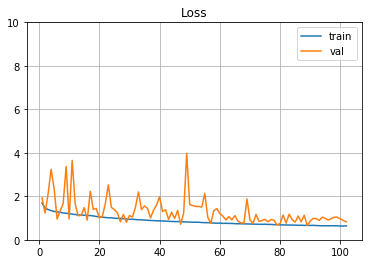

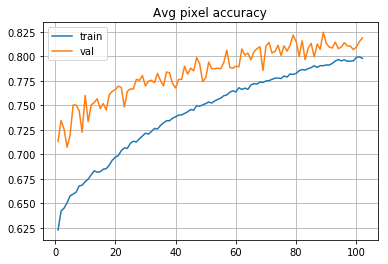

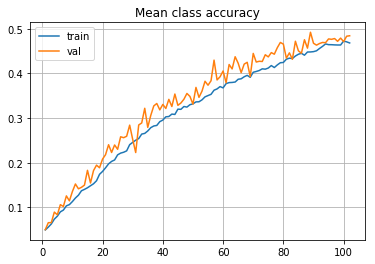

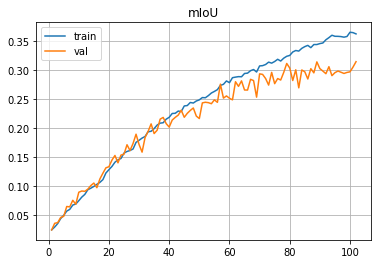

In [26]:
draw('results')

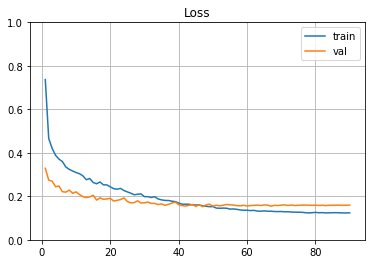

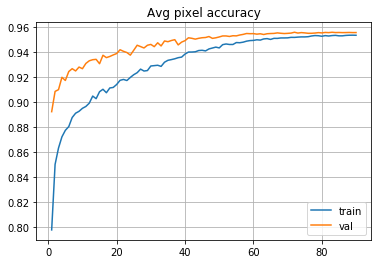

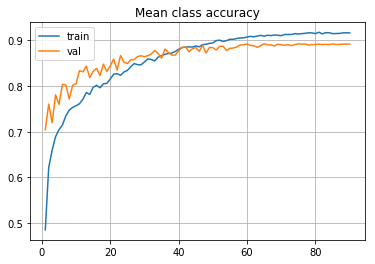

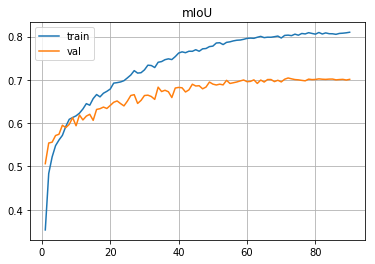

In [13]:
draw('results_pretrained', loss_range=[0,1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


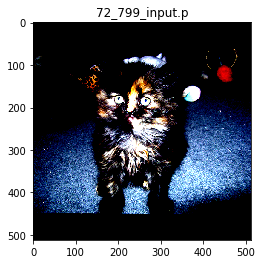

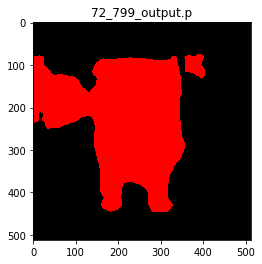

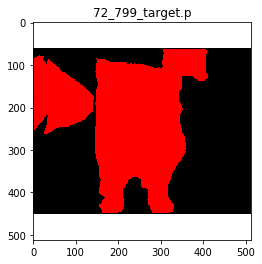

In [25]:
im_list = ['72_799_input.p', '72_799_output.p', '72_799_target.p']
draw_im('results_pretrained/saved_train_images/', im_list)